In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from keras.optimizers import Adam, SGD
from keras import regularizers

from preprocess import normalize

window_size_ms = 200.
samples_per_window = 20

/Users/jessy/.virtualenvs/cocosci/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
/Users/jessy/.virtualenvs/cocosci/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
X = np.load("processed/combined_X.npy")
has_touch_y = np.load("processed/combined_has_touch_y.npy")
touch_loc_y = np.load("processed/combined_touch_loc_y.npy")
X = X.reshape((-1, 120))
X = X[has_touch_y == 1]
touch_loc_y = touch_loc_y[has_touch_y == 1]
touch_loc_y = normalize(touch_loc_y)

Min:  [ 83.14286041 267.42855835]
Range:  [275.99999237 364.85714722]
lol?


In [3]:
print(X.shape)
print(touch_loc_y.shape)
print(np.ptp(X))
print(np.min(touch_loc_y))

(621, 120)
(621, 2)
0.9951763961601412
0.0


In [4]:
def build_model():
    model = Sequential()
    model.add(Dense(128, activation="relu", input_dim=(samples_per_window * 6)))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))#, kernel_regularizer=regularizers.l2(0.003)))
    model.add(Dense(2, activation="linear", kernel_initializer="normal"))
    model.compile(loss="mean_squared_error", optimizer=SGD(lr=0.01, momentum=0.9), metrics = ["mse"])
    return model

In [5]:
model = build_model()
history = model.fit(np.random.rand(*X.shape), np.random.rand(*touch_loc_y.shape), epochs=100)

Epoch 1/100
621/621 [==============================] - 0s - loss: 0.1497 - mean_squared_error: 0.1497     
Epoch 2/100
621/621 [==============================] - 0s - loss: 0.0865 - mean_squared_error: 0.0865     
Epoch 3/100
621/621 [==============================] - 0s - loss: 0.0833 - mean_squared_error: 0.0833     
Epoch 4/100
621/621 [==============================] - 0s - loss: 0.0825 - mean_squared_error: 0.0825     
Epoch 5/100
621/621 [==============================] - 0s - loss: 0.0816 - mean_squared_error: 0.0816     
Epoch 6/100
621/621 [==============================] - 0s - loss: 0.0817 - mean_squared_error: 0.0817     
Epoch 7/100
621/621 [==============================] - 0s - loss: 0.0807 - mean_squared_error: 0.0807     
Epoch 8/100
621/621 [==============================] - 0s - loss: 0.0798 - mean_squared_error: 0.0798     
Epoch 9/100
621/621 [==============================] - 0s - loss: 0.0810 - mean_squared_error: 0.0810     
Epoch 10/100
621/621 [===============

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history["loss"])

In [6]:
kf = KFold(n_splits = 5, shuffle=True)
seed = 0

mses = []
histories = []

for train_idx, test_idx in kf.split(X, touch_loc_y):
    x_train, x_test = X[train_idx], X[test_idx]
    y_train, y_test = touch_loc_y[train_idx], touch_loc_y[test_idx]
    
    model = build_model()

    history = model.fit(x_train, y_train, epochs=200, batch_size=20, validation_data=(x_test, y_test))
    _, mse = model.evaluate(x_test, y_test)
    print("MSE: ", mse)
    mses.append(mse)
    histories.append(history)

Train on 496 samples, validate on 125 samples
Epoch 1/200
496/496 [==============================] - 0s - loss: 0.0691 - mean_squared_error: 0.0691 - val_loss: 0.0375 - val_mean_squared_error: 0.0375
Epoch 2/200
496/496 [==============================] - 0s - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 3/200
496/496 [==============================] - 0s - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 4/200
496/496 [==============================] - 0s - loss: 0.0384 - mean_squared_error: 0.0384 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 5/200
496/496 [==============================] - 0s - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 6/200
496/496 [==============================] - 0s - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 7/200
496/496 [=========

496/496 [==============================] - 0s - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 54/200
496/496 [==============================] - 0s - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 55/200
496/496 [==============================] - 0s - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 56/200
496/496 [==============================] - 0s - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 57/200
496/496 [==============================] - 0s - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 58/200
496/496 [==============================] - 0s - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 59/200
496/496 [==============================] - 0s - loss: 0.0259 - mean_sq

496/496 [==============================] - 0s - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 106/200
496/496 [==============================] - 0s - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 107/200
496/496 [==============================] - 0s - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 108/200
496/496 [==============================] - 0s - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 109/200
496/496 [==============================] - 0s - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 110/200
496/496 [==============================] - 0s - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 111/200
496/496 [==============================] - 0s - loss: 0.0221 - m

496/496 [==============================] - 0s - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 158/200
496/496 [==============================] - 0s - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 159/200
496/496 [==============================] - 0s - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 160/200
496/496 [==============================] - 0s - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 161/200
496/496 [==============================] - 0s - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 162/200
496/496 [==============================] - 0s - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 163/200
496/496 [==============================] - 0s - loss: 0.0207 - m

497/497 [==============================] - 0s - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 9/200
497/497 [==============================] - 0s - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 10/200
497/497 [==============================] - 0s - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.0340 - val_mean_squared_error: 0.0340
Epoch 11/200
497/497 [==============================] - 0s - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 12/200
497/497 [==============================] - 0s - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 13/200
497/497 [==============================] - 0s - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 14/200
497/497 [==============================] - 0s - loss: 0.0316 - mean_squ

497/497 [==============================] - 0s - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 61/200
497/497 [==============================] - 0s - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 62/200
497/497 [==============================] - 0s - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 63/200
497/497 [==============================] - 0s - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 64/200
497/497 [==============================] - 0s - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 65/200
497/497 [==============================] - 0s - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 66/200
497/497 [==============================] - 0s - loss: 0.0250 - mean_sq

497/497 [==============================] - 0s - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 113/200
497/497 [==============================] - 0s - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 114/200
497/497 [==============================] - 0s - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 115/200
497/497 [==============================] - 0s - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 116/200
497/497 [==============================] - 0s - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 117/200
497/497 [==============================] - 0s - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 118/200
497/497 [==============================] - 0s - loss: 0.0225 - m

497/497 [==============================] - 0s - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 165/200
497/497 [==============================] - 0s - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 166/200
497/497 [==============================] - 0s - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 167/200
497/497 [==============================] - 0s - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 168/200
497/497 [==============================] - 0s - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 169/200
497/497 [==============================] - 0s - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 170/200
497/497 [==============================] - 0s - loss: 0.0196 - m

497/497 [==============================] - 0s - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 16/200
497/497 [==============================] - 0s - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.0344 - val_mean_squared_error: 0.0344
Epoch 17/200
497/497 [==============================] - 0s - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 18/200
497/497 [==============================] - 0s - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 19/200
497/497 [==============================] - 0s - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 20/200
497/497 [==============================] - 0s - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 21/200
497/497 [==============================] - 0s - loss: 0.0296 - mean_sq

497/497 [==============================] - 0s - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 68/200
497/497 [==============================] - 0s - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 69/200
497/497 [==============================] - 0s - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0317 - val_mean_squared_error: 0.0317
Epoch 70/200
497/497 [==============================] - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 71/200
497/497 [==============================] - 0s - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 72/200
497/497 [==============================] - 0s - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 73/200
497/497 [==============================] - 0s - loss: 0.0225 - mean_sq

497/497 [==============================] - 0s - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 120/200
497/497 [==============================] - 0s - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 121/200
497/497 [==============================] - 0s - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 122/200
497/497 [==============================] - 0s - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 123/200
497/497 [==============================] - 0s - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 124/200
497/497 [==============================] - 0s - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 125/200
497/497 [==============================] - 0s - loss: 0.0198 - m

497/497 [==============================] - 0s - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 172/200
497/497 [==============================] - 0s - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 173/200
497/497 [==============================] - 0s - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 174/200
497/497 [==============================] - 0s - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 175/200
497/497 [==============================] - 0s - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 176/200
497/497 [==============================] - 0s - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 177/200
497/497 [==============================] - 0s - loss: 0.0175 - m

497/497 [==============================] - 0s - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 24/200
497/497 [==============================] - 0s - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0375 - val_mean_squared_error: 0.0375
Epoch 25/200
497/497 [==============================] - 0s - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 26/200
497/497 [==============================] - 0s - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 27/200
497/497 [==============================] - 0s - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 28/200
497/497 [==============================] - 0s - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 29/200
497/497 [==============================] - 0s - loss: 0.0263 - mean_sq

497/497 [==============================] - 0s - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 76/200
497/497 [==============================] - 0s - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 77/200
497/497 [==============================] - 0s - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 78/200
497/497 [==============================] - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 79/200
497/497 [==============================] - 0s - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 80/200
497/497 [==============================] - 0s - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 81/200
497/497 [==============================] - 0s - loss: 0.0224 - mean_sq

497/497 [==============================] - 0s - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 128/200
497/497 [==============================] - 0s - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 129/200
497/497 [==============================] - 0s - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 130/200
497/497 [==============================] - 0s - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 131/200
497/497 [==============================] - 0s - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 132/200
497/497 [==============================] - 0s - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 133/200
497/497 [==============================] - 0s - loss: 0.0198 - m

497/497 [==============================] - 0s - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 180/200
497/497 [==============================] - 0s - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 181/200
497/497 [==============================] - 0s - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 182/200
497/497 [==============================] - 0s - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 183/200
497/497 [==============================] - 0s - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 184/200
497/497 [==============================] - 0s - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 185/200
497/497 [==============================] - 0s - loss: 0.0175 - m

497/497 [==============================] - 0s - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 32/200
497/497 [==============================] - 0s - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 33/200
497/497 [==============================] - 0s - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 34/200
497/497 [==============================] - 0s - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 35/200
497/497 [==============================] - 0s - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 36/200
497/497 [==============================] - 0s - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 37/200
497/497 [==============================] - 0s - loss: 0.0278 - mean_sq

497/497 [==============================] - 0s - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 84/200
497/497 [==============================] - 0s - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 85/200
497/497 [==============================] - 0s - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 86/200
497/497 [==============================] - 0s - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 87/200
497/497 [==============================] - 0s - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 88/200
497/497 [==============================] - 0s - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 89/200
497/497 [==============================] - 0s - loss: 0.0245 - mean_sq

497/497 [==============================] - 0s - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 136/200
497/497 [==============================] - 0s - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 137/200
497/497 [==============================] - 0s - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 138/200
497/497 [==============================] - 0s - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 139/200
497/497 [==============================] - 0s - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 140/200
497/497 [==============================] - 0s - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 141/200
497/497 [==============================] - 0s - loss: 0.0213 - m

497/497 [==============================] - 0s - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 188/200
497/497 [==============================] - 0s - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 189/200
497/497 [==============================] - 0s - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 190/200
497/497 [==============================] - 0s - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 191/200
497/497 [==============================] - 0s - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 192/200
497/497 [==============================] - 0s - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 193/200
497/497 [==============================] - 0s - loss: 0.0182 - m

In [7]:
print(mses)
print(np.mean(mses))

[0.02169519028812647, 0.02543599849506732, 0.03010483326450471, 0.024613851561181007, 0.022579907169265133]
0.02488595615562893


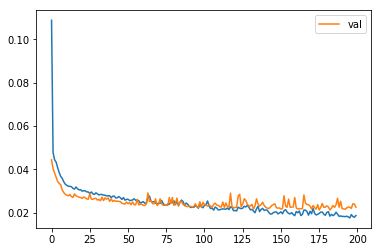

In [12]:
plt.plot(histories[4].history["loss"])
plt.plot(histories[4].history["val_loss"], label="val")
plt.legend()

/Users/jessy/.virtualenvs/cocosci/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


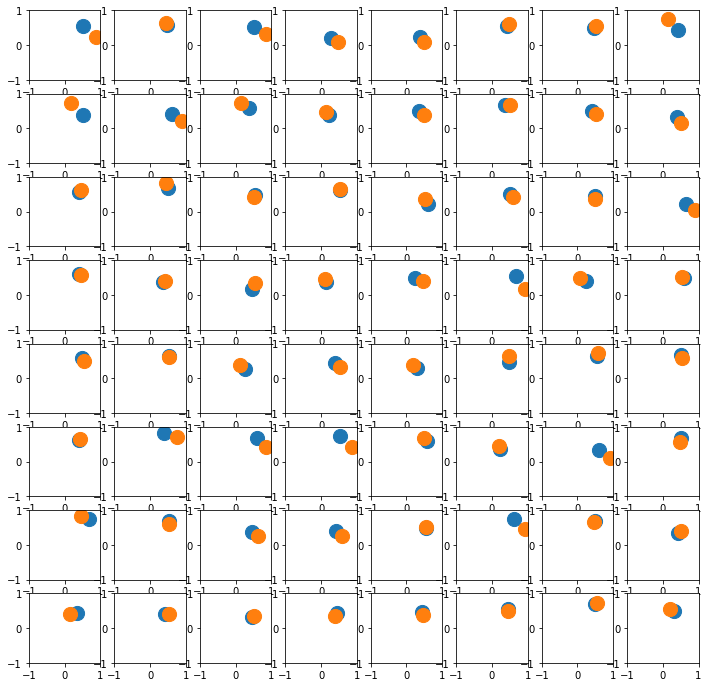

In [9]:
nrows = 8
ncols = 8

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
axes = axes.reshape(-1)

for i in range(nrows * ncols):
    axes[i].scatter(*model.predict(x_test)[i], s=200)
    axes[i].scatter(*y_test[i], s=200)
    
    axes[i].set_xlim(-1, 1)
    axes[i].set_ylim(-1, 1)

fig.show()